In [15]:
from sympy import diff, symbols, cos, sin, Function, Symbol, dsolve, exp
from sympy import *
from IPython.display import *
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import math as mt
import copy

## Лабораторная работа №7
**Задача Коши**

** Цель работы: **
научиться решать дифференциальные уравнения высших порядков (задачу Коши) с помощью итерационных методов и встроенных библиотек.

**Выполнила:** Егорова Екатерина, группа: 429

Решим уравнение:
$$y'' + 9y'-9y = cos(3x)e^{-x}$$

Для решения дифференциального уравнения будем использовать схему Роте с весами:
$$u_{i+1} = u_i + {t} (\alpha f(t_i, u_i) + (1- \alpha)f(t_{i+1}, u_{i+1})$$
$$u_0 = u^0$$ $$ \alpha \in [0,1] $$


Возьмем коэффициент:
$$\alpha = \frac{1}{3} $$
Построим графики: y(x) и y'(x)

Количество итераций:  9


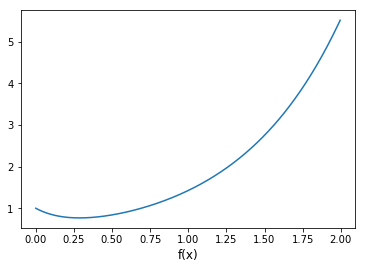

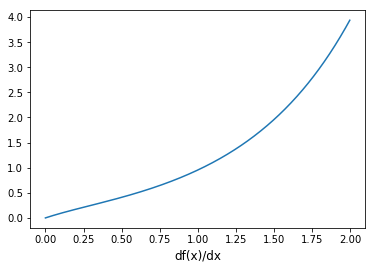

In [35]:
a = 1./3
b = 2./3
e = 0.01
k = 2
u1 = np.zeros((10000))
u0 = np.zeros((10000))
up = np.zeros((10000))
i = 0
u1[0] = 1
up[0] = 0
n=0
while abs(u1[2*i]-up[i])/abs(u1[2*i])>e :
    n+=1
    x = np.arange(0, 2, 1./k)
    t = 2./k
    up = u1
    u1[0] = 1
    u0[0] = 0
    for j in range(k):
        u1[j+1] = (u1[j] + t*9*a*u0[j] + t*9*a*u1[j] + t*a*cos(3*x[j])*exp(-x[j])+ 5*t*b*u0[j] 
                   +(t)**2*b*a*u1[j] +t*b*cos(3*x[j+1])*exp(-x[j+1]))/(1+ t*9*b - (t*b)**2)
        u0[j+1] = u0[j] + t*a*u1[j] + t*b*u1[j+1]
#         print('u1: ', u1[j+1])
#         print('u0: ', u0[j+1])
    i = 1
    k = k*2
print('Количество итераций: ', n)
f = []
i=0
while u1[i] !=0:
    f.append(u1[i])
    i+=1
fp = []
i=1
fp.append(0)
while u0[i] !=0:
#     print(u0[i])
    fp.append(u0[i])
    i+=1
# print(f)
# print(fp)
plt.plot(np.arange(0, 2, 2/len(f)), f)
plt.xlabel('f(x)',fontsize=12)
plt.show()

plt.plot(np.arange(0, 2, 2/len(f)), fp)
plt.xlabel('df(x)/dx',fontsize=12)
plt.show()

Найдем точное решение уравнения, используя библиотеку SymPy:

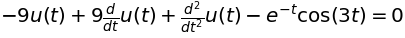

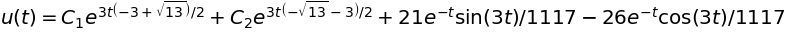

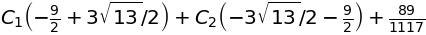

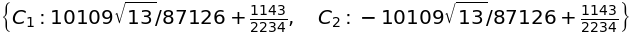

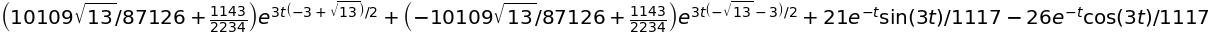

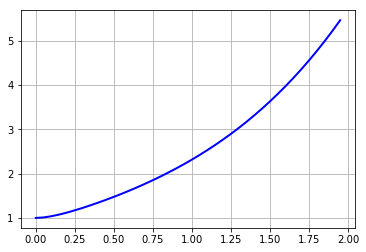

In [34]:
import numpy as np
from sympy import *
from IPython.display import *
import matplotlib.pyplot as plt
init_printing(use_latex=True)
var('t C1 C2')
u = Function("u")(t)  # Это переменная, но не функция.
# m=20 #Показатель массы.
# w=10.0#Показатель демпфирования колебаний.
# c=0.3#Показатель жёсткости.
# a=1#Бесконечный импульс силы.
#Все показатели условные(только для исследования характера зависимостей).
t#Текущее время.
r = 9
m = 0.33333333
c = 3
a=0
de = Eq(u.diff(t,t)+r*u.diff(t)-r*u- cos(c*t)*exp(-t), a) #-Дифференциальное уравнение колебаний.
display(de)#-Вывод на дисплей.
des = dsolve(de,u)#Символьное решение уравнения методом Коши в общем виде.
display(des)#Вывод на дисплей.
eq1=des.rhs.subs(t,0)-1;#Условие равенства нулю перемещения в момент времени t=0.
display(eq1)#Вывод на дисплей.
eq2=des.rhs.diff(t).subs(t,0)#Условие равенства нулю скорости перемещения в момент
# времени t=0.
display(eq2)#Вывод на дисплей.
seq=solve([eq1,eq2],C1,C2)#Решение системы для определения коэффициентов C1,C2.
display(seq)#Вывод на дисплей
rez=des.rhs.subs([(C1,seq[C1]),(C2,seq[C2])])#Вид решения дифференциального
#уравнения с численными значениями коэффициентов.
display(rez)#Вывод на дисплей.
f=lambdify(t, rez, "numpy")#Перевод символьного решения в численное для работы
#с модулем numpy .
ui=[]
x = np.arange(0.0,2,0.05)  
ui = f(x)
plt.plot(x,ui,color='b', linewidth=2)
plt.grid(True)
plt.show()


Найдем решение уравнения, используя встроенную в библиеотеку NumPy функцию:

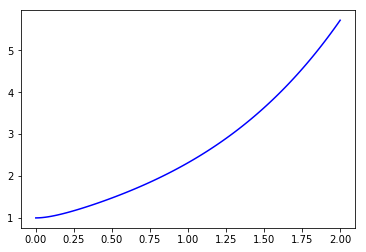

In [41]:
import numpy as np
import scipy as sp
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def g(y, x):
    y0 = y[0]
    y1 = y[1]
    y2 = -9*y1 + 9*y0 + cos(3*x)*exp(-x)
    return y1, y2

# Initial conditions on y, y' at x=0
init = 1.0, 0.0
# First integrate from 0 to 2
x = np.linspace(0,2,100)
sol=odeint(g, init, x)
# Then integrate from 0 to -2
plt.plot(x, sol[:,0], color='b')

plt.show()

**Вывод:** мы научились решать задачу Коши тремя способами(схема Роте, точное рушение, встроенная функция). Всеми методами получили одинаковые ответы.